### 01. Import dependencies

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

### 02.  Load dataset

In [2]:
df = pd.read_csv('../../../EDA/data/processed/Standarlized_data.csv')
df.head()

,Views,Views_norm,Platform_Instagram,Platform_TikTok,Platform_Twitter,Platform_YouTube,Hashtag_#Challenge,Hashtag_#Comedy,Hashtag_#Dance,Hashtag_#Education,...,Content_Type_Tweet,Content_Type_Video,Region_Australia,Region_Brazil,Region_Canada,Region_Germany,Region_India,Region_Japan,Region_UK,Region_USA
0,1.107899,1.082627,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.102474,1.179045,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.749350,0.725553,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.232312,-1.236311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.939839,-0.915398,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_pca = df.copy()

### 03. Apply PCA

In [4]:
pca = PCA(n_components=None, random_state=42)
pca_scores = pca.fit_transform(X_pca)

### 04. Explained variance

In [5]:

# Explained variance details
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

variance_df = pd.DataFrame(
    {
        'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
        'Explained_Variance': explained_variance,
        'Cumulative_Variance': cumulative_variance,
    }
)
variance_df.head(10)

,PC,Explained_Variance,Cumulative_Variance
0,PC1,0.373354,0.373354
1,PC2,0.049186,0.422540
2,PC3,0.046353,0.468893
3,PC4,0.045077,0.513970
4,PC5,0.032104,0.546074
5,PC6,0.031930,0.578004
6,PC7,0.031588,0.609592
7,PC8,0.030932,0.640524
8,PC9,0.029902,0.670426
9,PC10,0.025185,0.695611


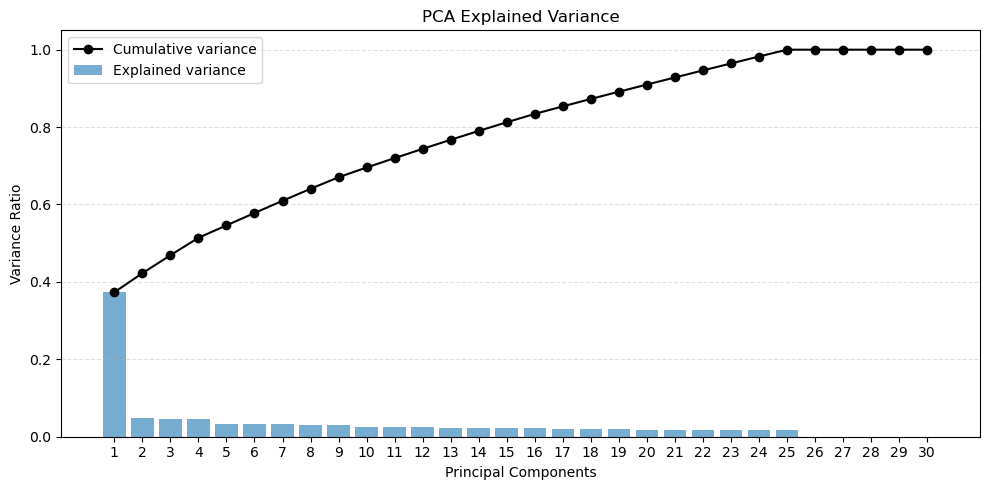

In [6]:
# Plot explained and cumulative variance
plt.figure(figsize=(10, 5))
components = range(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.6, label='Explained variance')
plt.plot(components, cumulative_variance, marker='o', color='black', label='Cumulative variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(components)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

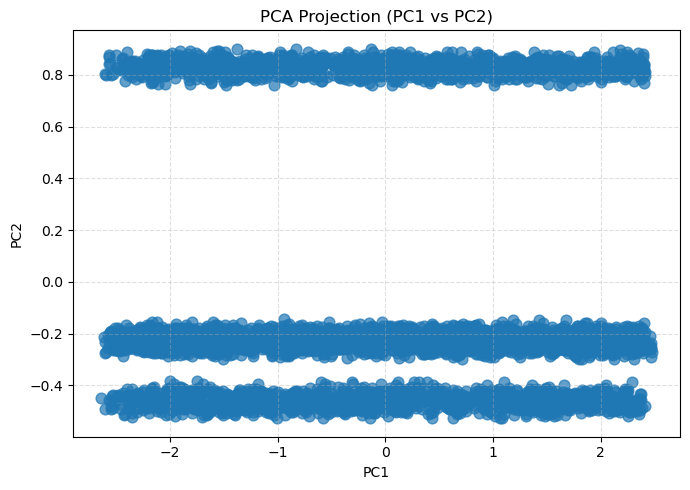

In [7]:
# 2D PCA visualization (first two components)
plt.figure(figsize=(7, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (PC1 vs PC2)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

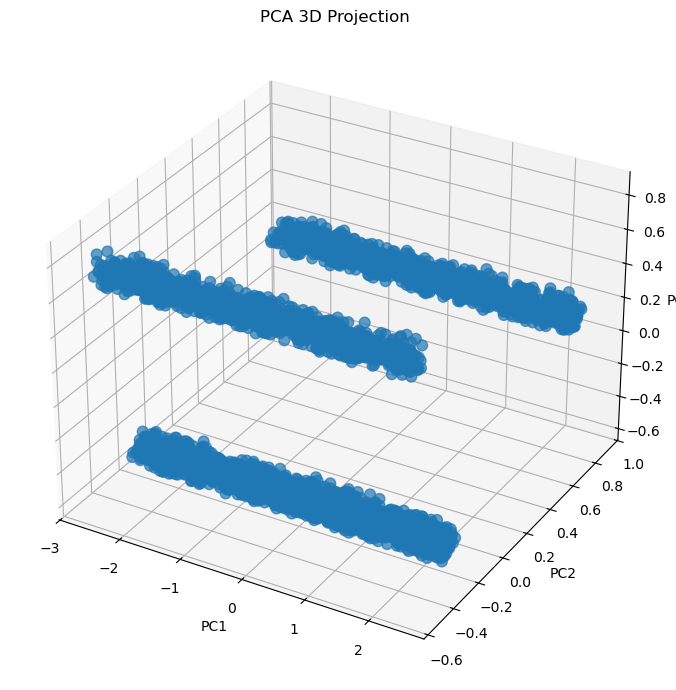

In [8]:
# Optional: simple 3D visualization
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

pca_3d = PCA(n_components=3, random_state=42)
scores_3d = pca_3d.fit_transform(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores_3d[:, 0], scores_3d[:, 1], scores_3d[:, 2], s=60, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Projection')
plt.tight_layout()
plt.show()

### Saving Dataset

In [9]:
# Save first six principal components
n_components_to_save = min(6, pca_scores.shape[1])
pca_top = pd.DataFrame(
    pca_scores[:, :n_components_to_save],
    columns=[f'PC{i+1}' for i in range(n_components_to_save)],
)
output_path = '../data/PCA__components.csv'
pca_top.to_csv(output_path, index=False)
print(f'Saved top {n_components_to_save} principal components to: {output_path}')


Saved top 6 principal components to: ../data/PCA__components.csv


In [10]:
pca_top

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.551478,-0.458427,0.756014,0.038581,0.024421,0.008358
1,1.604157,-0.211674,-0.429546,0.756912,-0.036418,0.097103
2,1.051584,-0.228823,-0.491327,-0.644556,0.046361,0.035951
3,-1.747707,0.854647,0.181268,0.050873,-0.082398,-0.052823
4,-1.323954,-0.193574,-0.414910,0.752750,-0.051228,-0.023053
...,...,...,...,...,...,...
4725,1.649946,0.791136,0.168837,0.028807,-0.019489,0.023585
4726,2.321703,-0.241690,-0.433286,0.778734,0.018338,0.071988
4727,-0.639531,0.861361,0.144866,-0.039042,-0.032099,-0.086883
4728,-0.391325,-0.242818,-0.422805,0.768856,-0.073070,0.114411
